# Hypothesis testing

## La hipótesis nula y la hipótesis alternativa

Uno de los más importantes métodos en la estadística inferencial es el contraste de hipótesis o hypothesis testing. En el contraste de hipótesis, nosotros intentamos determinar si una cierta hipótesis o cuestión es cierta o no, y en que grado.

El objetivo del contraste de hipótesis es responder a la pregunta: *Dada una muestra y un efecto aparente, ¿Cuál es la probabilidad de ver tal efecto por azar?*
The goal of classical hypothesis testing is to answer the question, “Given a sample and
an apparent effect, what is the probability of seeing such an effect by chance?” Here’s
how we answer that question:

1. El primer paso es cuantificar el tamaño del *efecto aparente* eligiendo un test estadístico.
2. Definimos la hipótesis nula, la cual es un modelo del sistema que asume que el efecto aparente no es real.
3. Calculamos el valor **p**, el cual es la probabilidad de ver el efecto si la hipótesis nula es cierta.
4. Interpretamos los resultados. Si el valor **p** es bajo, el efecto es estadísticamente significante, lo cual significa que tal efecto no ocurre por azar. En el caso de inferir el efecto es más probable que aparezca en una muestra mayor.

 $H_{0}$: Hipótesis nula 

 $H_{1}$: Hipótesis alternativa

La hipótesis nula es el valor histórico o valor promedio, mientras que la hipótesis alternativa es aquella que contradice a la hipótesis nula, es decir, aquella que queremos probar si es verdadera o falsa.

Por ejemplo:

La edad promedio en Barcelona es inferior a 38 años (hipótesis nula), pero realizando un muestreo, nuestro valor promedio es 42 años. Entonces la pregunta sería si la edad promedio en la ciudad de Barcelona a aumentado o si por el contrario nuestro valor promedio es erróneo. Este es un ejemplo de contraste unilateral.

### Contraste bilateral
$$
H_{0} : \mu = \mu_{0} \\
H_{1} : \mu \neq \mu_{0}
$$

### Contraste unilateral

$$
H_{0}: \mu \leq \mu_{0} \\
H_{1}: \mu > \mu_{0}
$$
$$
H_{0}: \mu \geq \mu_{0} \\
H_{1}: \mu < \mu_{0}
$$

In [1]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as ss
import seaborn as sns
import matplotlib.pyplot as plt

# set seaborn style
sns.set()

In [2]:
"""Funciones especiales"""

# Importamos la biblioteca necesaria para enlazar con el archivo requerido
import sys
sys.path.insert(0, '../statistics')

# importamos la función que necesitamos
#from DataManipulation import SampleRows
from reading_data import SampleRows, open_file, splitting
from functions import ecdf
from functions_corr import cov, correlation

## Contraste unilateral

In [3]:
# data
df_0 = open_file('data/sheffield_weather_station.csv', sep=" ", skiprows=8)
df_0.to_csv('Weather.csv', sep=',')
df_0.head(10)

El data set tiene 1602 filas y 7 columnas


,af,mm,rain,sun,tmax,tmin,yyyy
0,6,1,122.1,---,6.3,1.7,1883
1,2,2,69.8,---,8.0,2.8,1883
2,23,3,29.6,---,4.8,-1.6,1883
3,2,4,74.0,---,12.2,3.8,1883
4,0,5,31.2,---,14.7,6.2,1883
5,0,6,66.2,---,17.7,9.3,1883
6,0,7,77.6,---,18.8,10.5,1883
7,0,8,32.5,---,19.8,10.9,1883
8,0,9,137.4,---,16.8,10.0,1883
9,0,10,102.9,---,12.7,6.4,1883


In [4]:
# Analizamos el data set
df_0.describe()

,af,mm,rain,sun,tmax,tmin,yyyy
count,1602,1602,1602,1602,1602,1602,1602
unique,29,12,926,831,222,167,134
top,0,1,48.0,---,---,3.4,1943
freq,872,134,6,553,24,25,12


In [5]:
# tipos del data set
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 7 columns):
af      1602 non-null object
mm      1602 non-null object
rain    1602 non-null object
sun     1602 non-null object
tmax    1602 non-null object
tmin    1602 non-null object
yyyy    1602 non-null object
dtypes: object(7)
memory usage: 87.7+ KB


In [6]:
# extraemos las lluvias de julio
rain_july = df_0[df_0.loc[:,'mm'] == '7']['rain'].values

# filtramos los datos
rain_july = np.array(list(filter(lambda x: x != "---", rain_july)))

# convertimos a entero
rain_july = np.array(list(map(float, rain_july)))

# extraemos las lluvias de noviembre
rain_november = df_0[df_0.loc[:,'mm'] == '10']['rain'].values

# filtramos los datos
rain_november = np.array(list(filter(lambda x: x != "---", rain_november)))

# convertimos a entero
rain_november = np.array(list(map(float, rain_november)))

# info
print("Noviembre: ", rain_november.shape)
print("Julio: ", rain_july.shape)

Noviembre:  (133,)
Julio:  (133,)


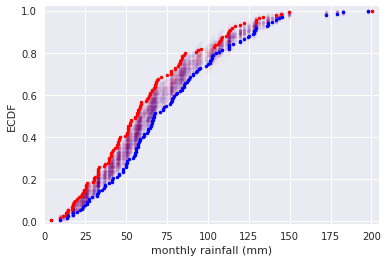

In [7]:
# Generate permutation samples
data_0 = np.r_[rain_july, rain_november]


for _ in range(50):
    perm_data = np.random.permutation(data_0)

    perm_sample_1 = perm_data[len(rain_july):]
    perm_sample_2 = perm_data[:len(rain_november)]


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_july)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

Podemos observar que las muestras permutadas se superponen. Ninguna de las funciones de distribución acumulada sobrepasa los datos observados, esto nos sugiere que la **hipótesis** no es conmensurable con los datos, por lo tanto julio y noviembre tienen diferentes distribuciones de lluvia.

Pero pongamos todo esto en números. Podemos calcular un valor, llamado **valor-p**, que nos dará una probabilidad de que la hipótesis nula sea cierta.

### Valor-p

Si las distribuciones de lluvia son parecidas para julio y noviembre, la diferencia entre sus medias debería de ser cero. Podemos realizar distintas permutaciones como hemos hecho anteriormente, con los datos de lluvia mezclados, y utilizarlos para calcular las medias de todas las permutaciones que hagamos. Posteriormente compararemos dicha media con la media *real*.

In [8]:
# diferencias entre las medias de los dos conjuntos
diff_med = np.abs(np.mean(rain_july) - np.mean(rain_november))

# realizamos n = 10.000 permutaciones
reps = 10000
perm_mean = np.empty(reps)

for i in range(reps):
    perm_data = np.random.permutation(data_0)

    perm_sample_1 = perm_data[len(rain_july):]
    perm_sample_2 = perm_data[:len(rain_november)]
    
    # calculamos la media
    perm_mean[i] = np.abs(np.mean(perm_sample_1) - np.mean(perm_sample_2))

# comprobamos los valores por encima de la media
p = np.sum(perm_mean >= diff_med) / reps

print("Valor p: ", p)

Valor p:  0.0034


#### Resultados

Muy pocos valores, de los obtenidos en las distintas permutaciones, han resultado ser mayores que la diferencia de la media real. Estos valores procedían de la suposición (hipótesis) de que las distribuciones de las lluvias eran idénticas, por tanto no importaba de donde coger los datos, ya que estos estaban igualmente distribuidos. El resultado es que solo un 0.2% de los valores aceptan la **hipótesis nula**, por lo que esta es rechazada. Las distribuciones de lluvia en julio y en agosto son diferentes.

In [9]:
# data
df_1 = pd.read_csv('data/TSheightweight.csv', header = 0, index_col = 0)
df_1.head(10)

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82.0,2,76.363636,185.870345,70.91,157.0
1,65.0,2,72.727273,126.603027,72.73,163.0
2,48.0,2,NaN,181.063210,NaN,165.0
3,61.0,1,73.636364,517.926275,73.64,170.0
4,26.0,1,88.636364,1252.624630,88.64,185.0
5,42.0,1,118.181818,415.161314,109.09,183.0
6,40.0,2,50.000000,422.810541,50.00,157.0
7,24.0,2,131.818182,1280.585980,122.73,178.0
8,37.0,1,87.727273,1245.060440,90.00,178.0
9,65.0,1,77.272727,382.738158,77.27,173.0


In [10]:
# Estadística descriptiva
df_1['age'].describe()

count    410856.000000
mean         54.862180
std          16.737702
min          18.000000
25%          43.000000
50%          55.000000
75%          67.000000
max          99.000000
Name: age, dtype: float64

Vemos que la media de edad de este conjunto de datos es *55* años. ¿Es esta media significativa? Para responder a esta pregunta vamos a escoger una muestra de esta población y vamos a comprar dicho valor. 

In [11]:
# Data
df = pd.read_csv('data/female_literacy_fertility.csv', header=0, index_col=0)
df.head(10)

,Continent,female literacy,fertility,population
Country,,,,
Chine,ASI,90.5,1.769,"1,324,655,000"
Inde,ASI,50.8,2.682,"1,139,964,932"
USA,NAM,99.0,2.077,"304,060,000"
Indonésie,ASI,88.8,2.132,"227,345,082"
Brésil,LAT,90.2,1.827,"191,971,506"
Pakistan,ASI,40.0,3.872,"166,111,487"
Bangladesh,ASI,49.8,2.288,"160,000,128"
Nigéria,AF,48.8,5.173,"151,212,254"
Fédération de Russie,EUR,99.4,1.393,"141,950,000"


Analizamos la posible correlación entre dos variables. En este caso hemos elegido un *dataset* en el cual existen dos variables interesantes: **fertilidad** y **analfabetismo**. A continuación vamos a realizar un análisis exploratorio de estas variables. Como podemos observar, los datos no nos dan el índice de analfabetismo sino el índice de alfabetización en cada país. Para obtener el índice de analfabetismo simplemente realizamos una *inversión* o diferencia.

In [12]:
# Exploratory analysis of female literacy and fertility
plt.scatter(dataset['female illiteracy'], dataset['fertility'], marker='.')
plt.xlabel('Female illiteracy')
plt.ylabel('Fertility')
plt.show()

NameError: name 'dataset' is not defined